In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import the trainingset
data = pd.read_csv('letter-recognition.csv',header=None)  
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [3]:
# data preprocessing for H, K
data = pd.read_csv('letter-recognition.csv',header=None) 
# pair H and K
data_H = data[data[0] == 'H']
data_K = data[data[0] == 'K']
data1 = pd.concat([data_H, data_K], axis=0)
data1.loc[data1[0] == 'H', 0] = 0
data1.loc[data1[0] == 'K', 0] = 1 


X_hk = data1[data1.columns[1:]]
X_hk.reset_index(drop=True, inplace=True)
y_hk = data1[0]
y_hk.reset_index(drop=True, inplace=True)
y_hk=y_hk.astype('int')

X_train_hk,X_test_hk, y_train_hk, y_test_hk = train_test_split(X_hk,y_hk,test_size=0.1, random_state=90)

F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-pa

max score：0.929056603773585 number of interation for max score：6


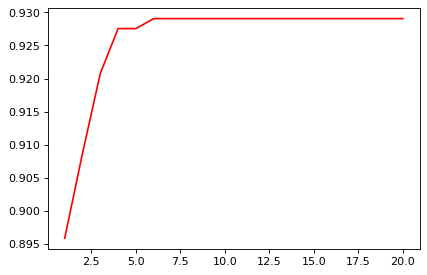

0.9262068965517241


In [4]:

test = []
for i in range(20):
    lr = LogisticRegression(penalty='l2',solver='liblinear'
                                      ,max_iter=i+1, 
                                     )
    lr.fit(X_train_hk,y_train_hk)
    score = cross_val_score(lr, X_train_hk, y_train_hk, cv=5).mean()
    test.append(score);
score_max = max(test)
print('max score：{}'.format(score_max),
      'number of interation for max score：{}'.format(test.index(score_max) + 1))
plt.figure(dpi=80)
plt.plot(range(1,21),test,'-r')
plt.show();
score = cross_val_score(lr, X_test_hk, y_test_hk, cv=5).mean()
print(score)


F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-pa

max score：0.8935849056603773 number of interation for max score：2


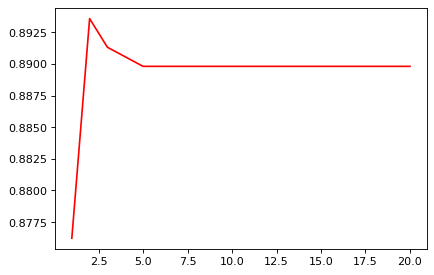

0.892183908045977


In [5]:
lr = LogisticRegression(penalty='l2',solver='liblinear'
                                     )

X_embedded_hk = SelectFromModel(lr, threshold = -np.inf, max_features = 4).fit_transform(X_hk, y_hk)
X_embedded_train_hk,X_embedded_test_hk, y_embedded_train_hk, y_embedded_test_hk = train_test_split(X_embedded_hk,y_hk,test_size=0.1,
                                                                                                   random_state=90)

test = []
for i in range(20):
    lr = LogisticRegression(penalty='l2',solver='liblinear'
                                      ,max_iter=i+1
                                     )
    lr.fit(X_embedded_train_hk,y_embedded_train_hk)
    score = cross_val_score(lr, X_embedded_train_hk, y_embedded_train_hk, cv=5).mean()
    test.append(score);
score_max = max(test)
print('max score：{}'.format(score_max),
      'number of interation for max score：{}'.format(test.index(score_max) + 1))
plt.figure(dpi=80)
plt.plot(range(1,21),test,'-r')
plt.show();
score = cross_val_score(lr, X_embedded_test_hk, y_embedded_test_hk, cv=5).mean()
print(score)

In [6]:
# data preprocessing for M, Y
data = pd.read_csv('letter-recognition.csv',header=None) 
# pair M and Y
data_M = data[data[0] == 'M']
data_Y = data[data[0] == 'Y']
data1 = pd.concat([data_M, data_Y], axis=0)
data1.loc[data1[0] == 'M', 0] = 0
data1.loc[data1[0] == 'Y', 0] = 1 


X_my = data1[data1.columns[1:]]
X_my.reset_index(drop=True, inplace=True)
y_my = data1[0]
y_my.reset_index(drop=True, inplace=True)
y_my=y_my.astype('int')

X_train_my,X_test_my, y_train_my, y_test_my = train_test_split(X_my,y_my,test_size=0.1, random_state=90)

F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-pa

max score：0.997887323943662 number of interation for max score：5


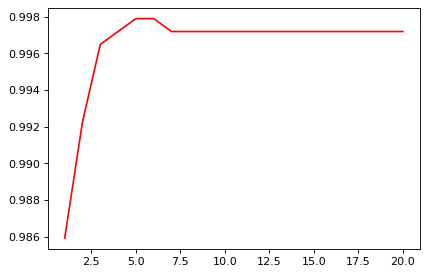

0.9875


In [7]:
test = []
for i in range(20):
    lr = LogisticRegression(penalty='l2',solver='liblinear'
                                      ,max_iter=i+1, 
                                     )
    lr.fit(X_train_my,y_train_my)
    score = cross_val_score(lr, X_train_my, y_train_my, cv=5).mean()
    test.append(score);
score_max = max(test)
print('max score：{}'.format(score_max),
      'number of interation for max score：{}'.format(test.index(score_max) + 1))
plt.figure(dpi=80)
plt.plot(range(1,21),test,'-r')
plt.show();
score = cross_val_score(lr, X_test_my, y_test_my, cv=5).mean()
print(score)

F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-pa

max score：0.9591549295774648 number of interation for max score：6


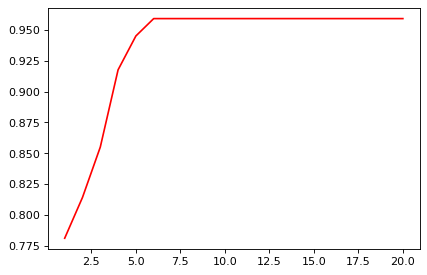

0.930241935483871


In [8]:
lr = LogisticRegression(penalty='l2',solver='liblinear'
                                     )

X_embedded_my = SelectFromModel(lr, threshold = -np.inf, max_features = 4).fit_transform(X_my, y_my)
X_embedded_train_my,X_embedded_test_my, y_embedded_train_my, y_embedded_test_my = train_test_split(X_embedded_my,y_my,test_size=0.1,
                                                                                                   random_state=90)

test = []
for i in range(20):
    lr = LogisticRegression(penalty='l2',solver='liblinear'
                                      ,max_iter=i+1
                                     )
    lr.fit(X_embedded_train_my,y_embedded_train_my)
    score = cross_val_score(lr, X_embedded_train_my, y_embedded_train_my, cv=5).mean()
    test.append(score);
score_max = max(test)
print('max score：{}'.format(score_max),
      'number of interation for max score：{}'.format(test.index(score_max) + 1))
plt.figure(dpi=80)
plt.plot(range(1,21),test,'-r')
plt.show();
score = cross_val_score(lr, X_embedded_test_my, y_embedded_test_my, cv=5).mean()
print(score)

In [9]:
# data preprocessing for E, F
data = pd.read_csv('letter-recognition.csv',header=None) 
# pair E and F
data_E = data[data[0] == 'E']
data_F = data[data[0] == 'F']
data1 = pd.concat([data_E, data_F], axis=0)
data1.loc[data1[0] == 'E', 0] = 0
data1.loc[data1[0] == 'F', 0] = 1 

X_ef = data1[data1.columns[1:]]
X_ef.reset_index(drop=True, inplace=True)
y_ef = data1[0]
y_ef.reset_index(drop=True, inplace=True)
y_ef=y_ef.astype('int')

X_train_ef,X_test_ef, y_train_ef, y_test_ef = train_test_split(X_ef,y_ef,test_size=0.1, random_state=90)

F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-pa

max score：0.9791055242448641 number of interation for max score：9


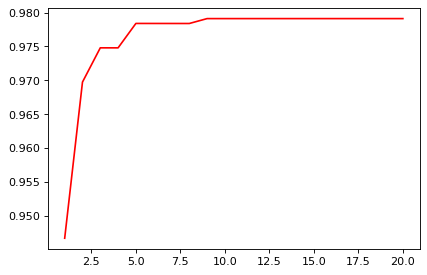

0.9870967741935484


In [10]:
test = []
for i in range(20):
    lr = LogisticRegression(penalty='l2',solver='liblinear'
                                      ,max_iter=i+1, 
                                     )
    lr.fit(X_train_ef,y_train_ef)
    score = cross_val_score(lr, X_train_ef, y_train_ef, cv=5).mean()
    test.append(score);
score_max = max(test)
print('max score：{}'.format(score_max),
      'number of interation for max score：{}'.format(test.index(score_max) + 1))
plt.figure(dpi=80)
plt.plot(range(1,21),test,'-r')
plt.show();
score = cross_val_score(lr, X_test_ef, y_test_ef, cv=5).mean()
print(score)

F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-pa

max score：0.9762252292029192 number of interation for max score：5


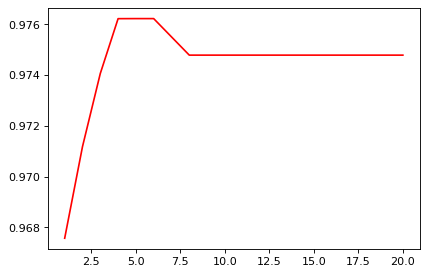

0.9870967741935484


In [11]:
lr = LogisticRegression(penalty='l2',solver='liblinear'
                                     )

X_embedded_ef = SelectFromModel(lr, threshold = -np.inf, max_features = 4).fit_transform(X_ef, y_ef)
X_embedded_train_ef,X_embedded_test_ef, y_embedded_train_ef, y_embedded_test_ef = train_test_split(X_embedded_ef,y_ef,test_size=0.1,
                                                                                                   random_state=90)

test = []
for i in range(20):
    lr = LogisticRegression(penalty='l2',solver='liblinear'
                                      ,max_iter=i+1
                                     )
    lr.fit(X_embedded_train_ef,y_embedded_train_ef)
    score = cross_val_score(lr, X_embedded_train_ef, y_embedded_train_ef, cv=5).mean()
    test.append(score);
score_max = max(test)
print('max score：{}'.format(score_max),
      'number of interation for max score：{}'.format(test.index(score_max) + 1))
plt.figure(dpi=80)
plt.plot(range(1,21),test,'-r')
plt.show();
score = cross_val_score(lr, X_embedded_test_ef, y_embedded_test_ef, cv=5).mean()
print(score)

In [11]:
#   data preprocessing for mulit
data = pd.read_csv('letter-recognition.csv',header=None) 
data
for i in range(20000):
    data.iloc[i, 0] = ord(data.iloc[i, 0]) - ord('A');
    
X_multi = data[data.columns[1:]]
X_multi.reset_index(drop=True, inplace=True)
y_multi = data[0]
y_multi.reset_index(drop=True, inplace=True)
y_multi =y_multi.astype('int')

X_train_multi,X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi,y_multi,test_size=0.1, random_state=90)

In [8]:
test = []
lr = LogisticRegression(penalty='l2',solver='liblinear'
                                      ,max_iter= 20)
lr.fit(X_train_multi,y_train_multi)
score = cross_val_score(lr, X_train_multi, y_train_multi, cv=5).mean()
test.append(score);
lr = LogisticRegression(penalty='l2',solver='liblinear'
                                      ,max_iter= 30)
lr.fit(X_train_multi,y_train_multi)
score = cross_val_score(lr, X_train_multi, y_train_multi, cv=5).mean()
test.append(score);
lr = LogisticRegression(penalty='l2',solver='liblinear'
                                      ,max_iter= 40)
lr.fit(X_train_multi,y_train_multi)
score = cross_val_score(lr, X_train_multi, y_train_multi, cv=5).mean()
test.append(score);
lr = LogisticRegression(penalty='l2',solver='liblinear'
                                      ,max_iter= 50)
lr.fit(X_train_multi,y_train_multi)
score = cross_val_score(lr, X_train_multi, y_train_multi, cv=5).mean()
test.append(score);
lr = LogisticRegression(penalty='l2',solver='liblinear'
                                      ,max_iter= 60)
lr.fit(X_train_multi,y_train_multi)
score = cross_val_score(lr, X_train_multi, y_train_multi, cv=5).mean()
test.append(score);
test

F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\conda\lib\site-pa

[0.7159444444444445,
 0.7173888888888889,
 0.7173888888888889,
 0.7173888888888889,
 0.7173888888888889]

In [12]:
score = cross_val_score(lr, X_test_multi, y_test_multi, cv=5).mean()
print(score)

0.6875


In [16]:
lr = LogisticRegression(penalty='l2',solver='liblinear'
                                     )

X_embedded_multi = SelectFromModel(lr, threshold = -np.inf, max_features = 4).fit_transform(X_multi, y_multi)
X_embedded_train_multi,X_embedded_test_multi, y_embedded_train_multi, y_embedded_test_multi = train_test_split(X_embedded_multi,y_multi,
                                                                                                         test_size=0.1,random_state=90)
test = []
lr = LogisticRegression(penalty='l2',solver='liblinear'
                                      ,max_iter= 20)
lr.fit(X_train_multi,y_train_multi)
score = cross_val_score(lr, X_embedded_train_multi, y_embedded_train_multi, cv=5).mean()
test.append(score);
lr = LogisticRegression(penalty='l2',solver='liblinear'
                                      ,max_iter= 30)
lr.fit(X_train_multi,y_train_multi)
score = cross_val_score(lr, X_embedded_train_multi, y_embedded_train_multi, cv=5).mean()
test.append(score);
lr = LogisticRegression(penalty='l2',solver='liblinear'
                                      ,max_iter= 40)
lr.fit(X_train_multi,y_train_multi)
score = cross_val_score(lr, X_embedded_train_multi, y_embedded_train_multi, cv=5).mean()
test.append(score);
lr = LogisticRegression(penalty='l2',solver='liblinear'
                                      ,max_iter= 50)
lr.fit(X_train_multi,y_train_multi)
score = cross_val_score(lr, X_embedded_train_multi, y_embedded_train_multi, cv=5).mean()
test.append(score);
lr = LogisticRegression(penalty='l2',solver='liblinear'
                                      ,max_iter= 60)
lr.fit(X_train_multi,y_train_multi)
score = cross_val_score(lr, X_embedded_train_multi, y_embedded_train_multi, cv=5).mean()
test.append(score);
test

F:\conda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[0.2008888888888889,
 0.2008888888888889,
 0.2008888888888889,
 0.2008888888888889,
 0.2008888888888889]

In [17]:
score = cross_val_score(lr, X_embedded_test_multi, y_embedded_test_multi, cv=5).mean()
print(score)

0.195
